In [1]:
import tensorflow as tf   

In [2]:
mnist = tf.keras.datasets.mnist

After Loading dataset, kemudian kita split antara data train dan data test

In [3]:
## unpacking the dataset into train and test datasets
(x_train,y_train),(x_test,y_test) = mnist.load_data()

jadi disini tuh ada 2 data, data testing sama data training
yang dilakukan adalah melakukan pemisahan antara features dan target

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


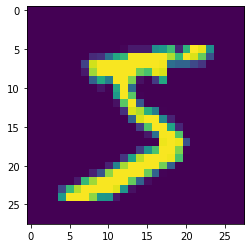

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show() #coba printshow

Checking the values of each pixel, before normalization

In [6]:
print(x_train[0].shape)

(28, 28)


Do Normalization, jadi ini nantinya akan mengganti range 0 ->255 ke 0->1

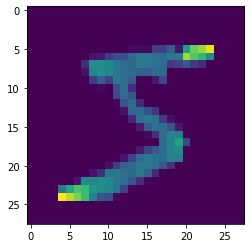

In [7]:
x_train = tf.keras.utils.normalize (x_train,axis =1)
x_test = tf.keras.utils.normalize (x_test,axis =1)
plt.imshow(x_train[0])

Resizing image to make it suitable for apply convolution operation

In [8]:
import numpy as np
img_size = 28
x_trainr=np.array(x_train).reshape(-1,img_size,img_size,1)
x_testr=np.array(x_test).reshape(-1,img_size,img_size,1)
print(x_trainr[0].shape)
print(x_testr.shape)
print("parameter diatas berarti ada (60ribu array,28 pixel horizontal, 28 pixel vertical,1 increasing dimension for kernel operation")

(28, 28, 1)
(10000, 28, 28, 1)
parameter diatas berarti ada (60ribu array,28 pixel horizontal, 28 pixel vertical,1 increasing dimension for kernel operation


Creating a Deep Neural network

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [10]:
model = Sequential()

#first convolution layer
model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu")) #activation function to make it non-linear
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connected Layer 1
model.add (Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 10)                108170    
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                        

In [12]:
print(len(x_trainr))

60000


In [13]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [14]:
model.fit(x_trainr,y_train,epochs =10,validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 22s 17ms/step - loss: 0.2984 - accuracy: 0.9152 - val_loss: 0.1479 - val_accuracy: 0.9580
Epoch 2/10
1313/1313 [==============================] - 27s 20ms/step - loss: 0.1110 - accuracy: 0.9685 - val_loss: 0.1043 - val_accuracy: 0.9689
Epoch 3/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0806 - accuracy: 0.9766 - val_loss: 0.0915 - val_accuracy: 0.9733
Epoch 4/10
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0660 - accuracy: 0.9809 - val_loss: 0.0893 - val_accuracy: 0.9730
Epoch 5/10
1313/1313 [==============================] - 20s 15ms/step - loss: 0.0562 - accuracy: 0.9828 - val_loss: 0.0819 - val_accuracy: 0.9755
Epoch 6/10
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0480 - accuracy: 0.9860 - val_loss: 0.0936 - val_accuracy: 0.9712
Epoch 7/10
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0416 - accuracy: 0.9871 - val_loss: 0.0814 -

In [15]:
test_loss,test_acc = model.evaluate(x_testr,y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0772 - accuracy: 0.9770
0.07722797989845276
0.9769999980926514


In [16]:
predictions = model.predict([x_testr])

In [17]:
print(predictions)

[[1.3140901e-10 4.9148940e-07 5.7157681e-08 ... 9.9999619e-01
  1.7342575e-07 7.1626908e-07]
 [2.3343443e-08 5.3383893e-04 9.9756795e-01 ... 1.3503038e-12
  1.6285358e-07 2.7623641e-12]
 [4.0052964e-07 9.9998116e-01 3.0571690e-07 ... 3.2078098e-08
  9.0449421e-06 1.0725667e-09]
 ...
 [8.5619723e-12 1.4873968e-08 2.4600397e-10 ... 7.1559845e-07
  1.4956141e-06 1.1328525e-05]
 [8.4614059e-11 2.9299649e-09 3.2942826e-11 ... 8.8860475e-08
  4.0008463e-03 8.6024643e-10]
 [5.8973715e-09 2.7911886e-09 5.2516032e-07 ... 7.8151992e-11
  3.0156485e-08 2.0992859e-13]]


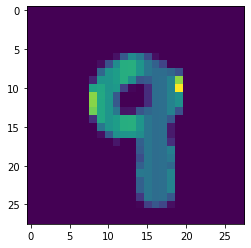

In [18]:
plt.imshow(x_test[214])

In [19]:
print(np.argmax(predictions[0]))

7


In [20]:
import cv2

In [21]:
img = cv2.imread('tujuh.png')

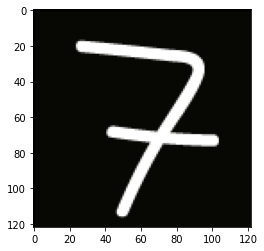

In [22]:
plt.imshow(img)

In [23]:
print(img.shape)

(122, 122, 3)


In [24]:
imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

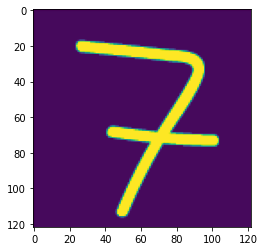

In [25]:
plt.imshow(imggray)

In [26]:
imggray.shape

(122, 122)

In [27]:
resizedimg = cv2.resize(imggray,(28,28))

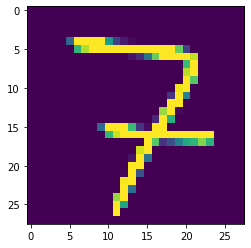

In [28]:
plt.imshow(resizedimg)

In [29]:
resizedimgnormalization = tf.keras.utils.normalize (resizedimg,axis =1)

In [30]:
resizedimgnormalization2=np.array(resizedimgnormalization).reshape(-1,img_size,img_size,1)


In [31]:
resizedimgnormalization2.shape

(1, 28, 28, 1)

In [32]:
predictionsbaru = model.predict([resizedimgnormalization2])


In [33]:
print(np.argmax(predictionsbaru))

7
